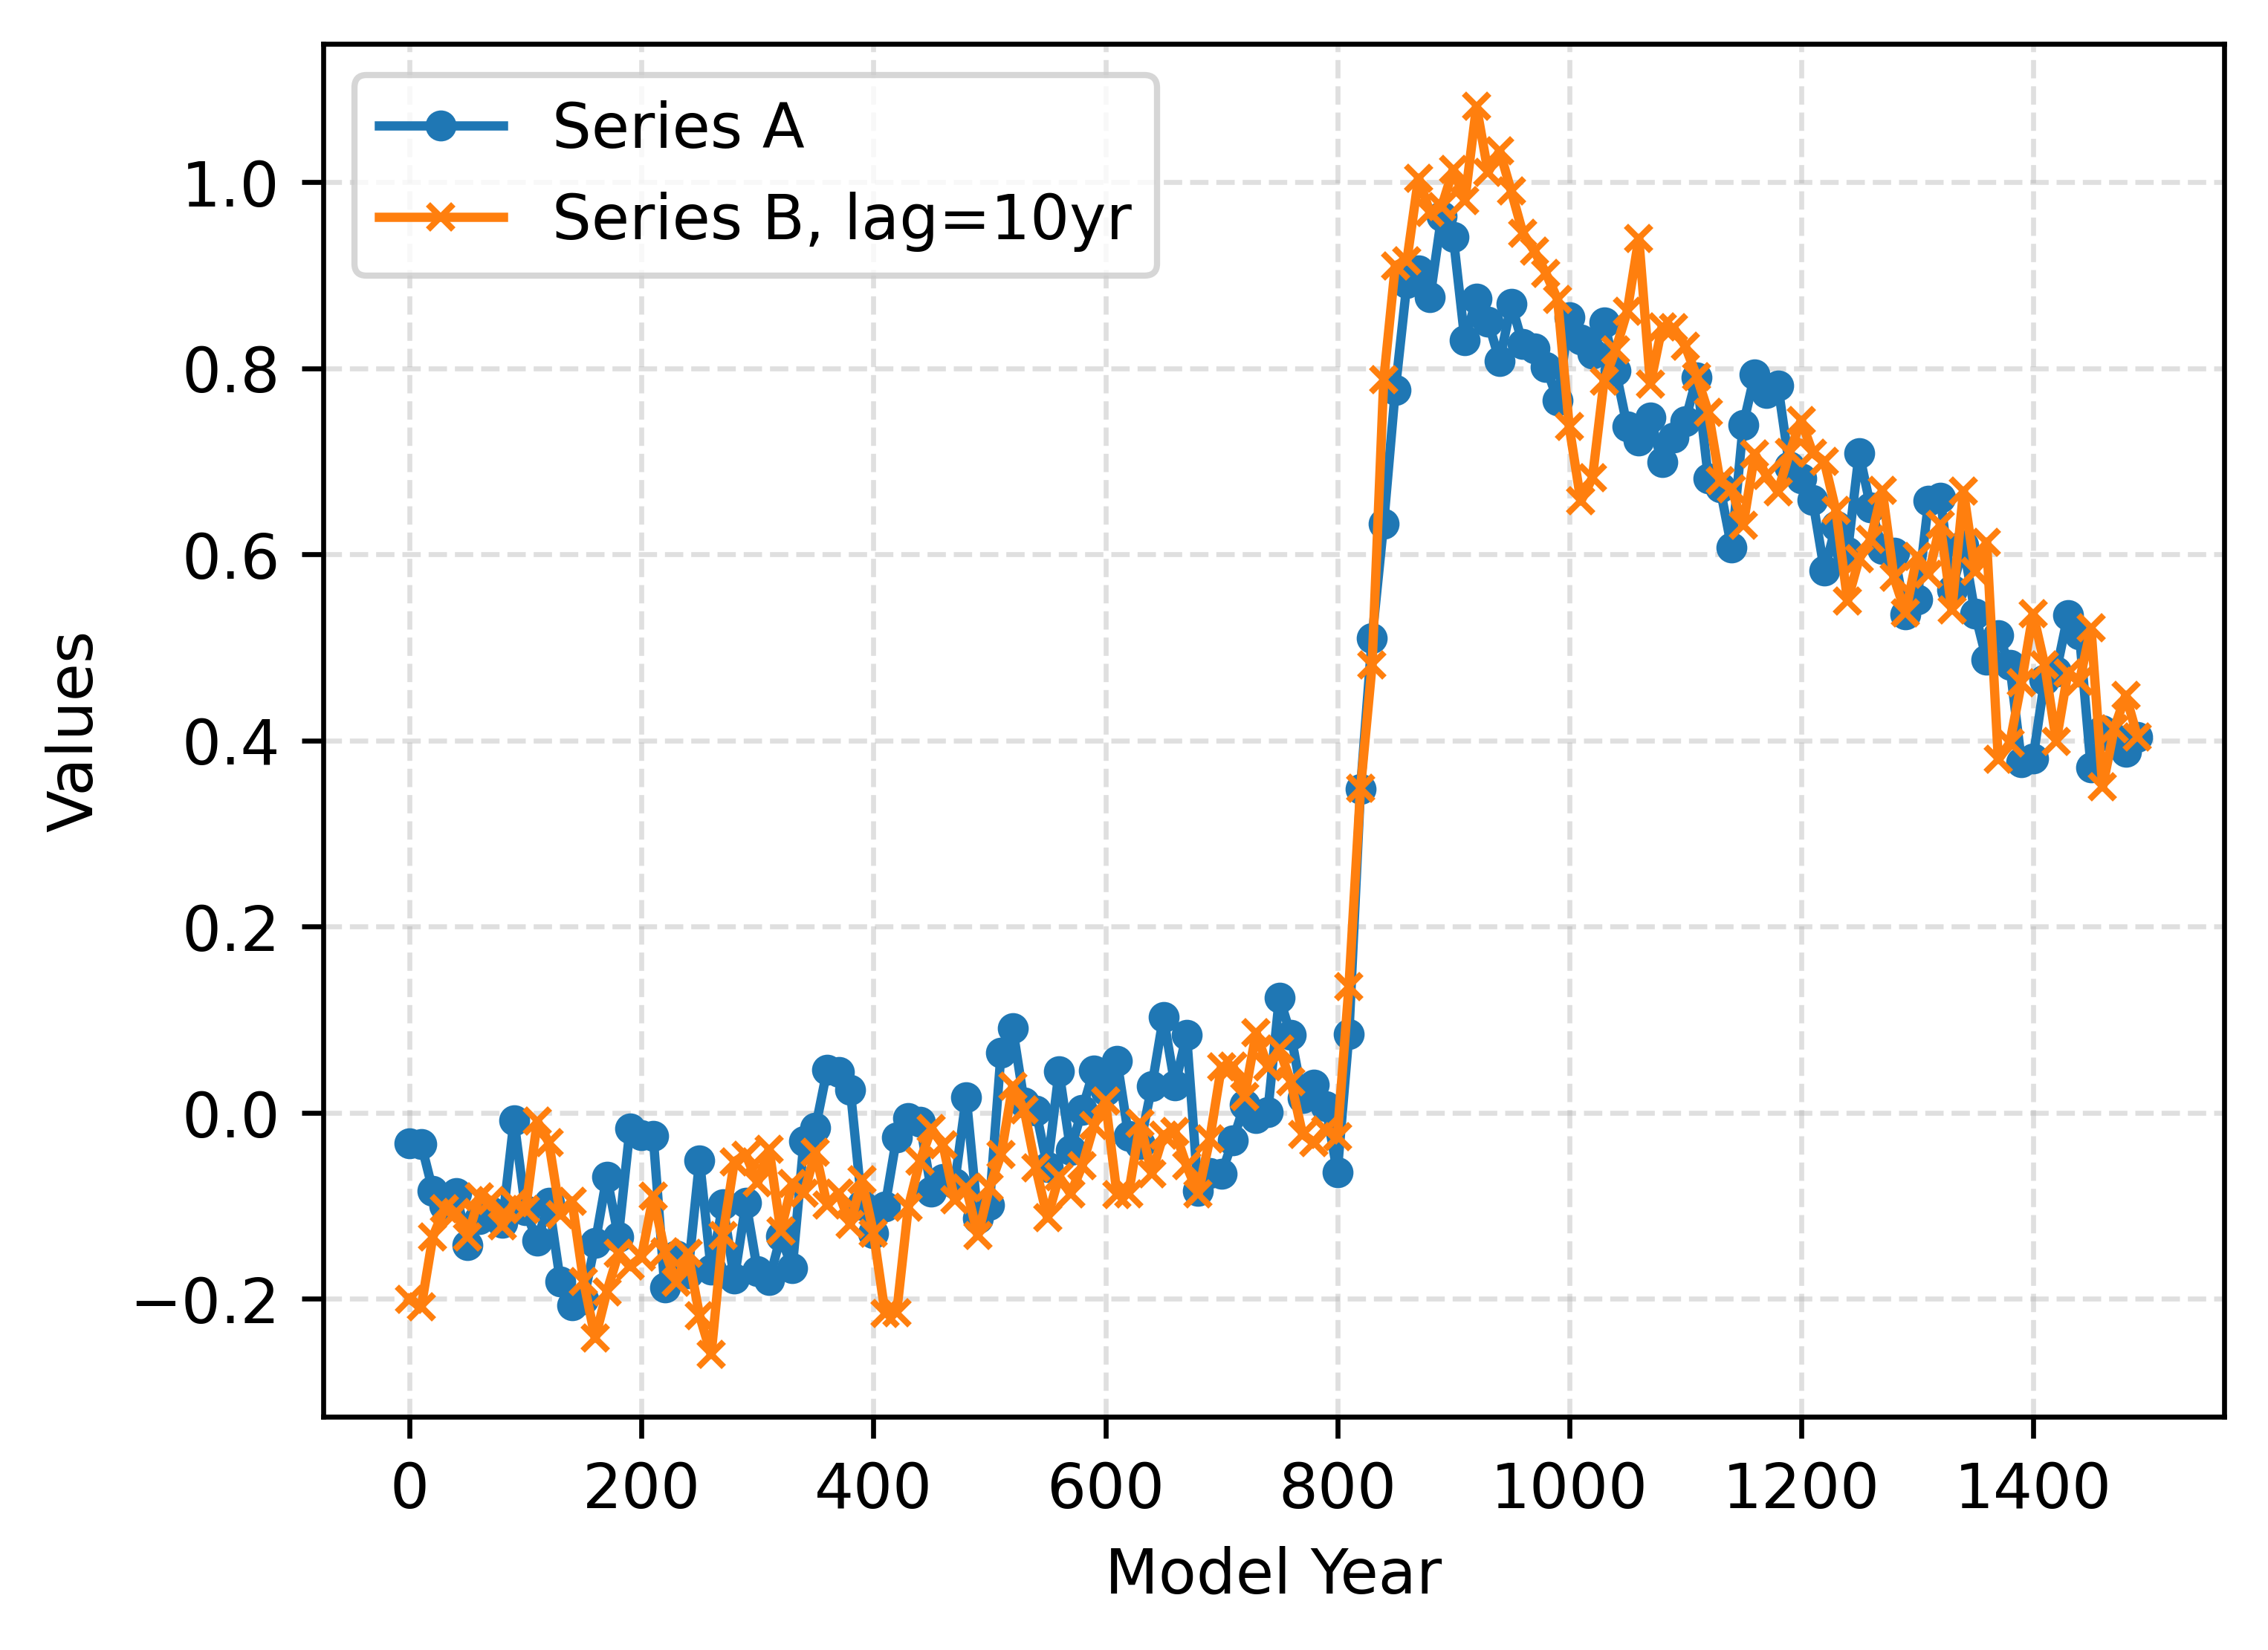

In [2]:
import matplotlib.pyplot as plt
from toolbox import syth_ana_functions as saf

lag=-1
# data = gen_bi_directional_data(length=1500, delta=10, lag=lag, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, tau=13.649751415738818, beta=0.3, sigma=0.05)
data = saf.gen_bi_directional_data(length=1500, delta=10.0, lag=lag, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, tau=13.649751415738818, beta=1e-5, sigma=0.05)
# data = gen_bi_directional_data(length=1500, delta=10.0, lag=-3, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, tau=13.649751415738818, beta=0.3, gamma=0.3, sigma=0.05)


# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests,kpss

# grangercausalitytests(dummy_warming_lagged[['A', 'B']], 5, verbose=True)
grangercausalitytests(data[['B', 'A']], 5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=35.3962 , p=0.0000  , df_denom=146, df_num=1
ssr based chi2 test:   chi2=36.1235 , p=0.0000  , df=1
likelihood ratio test: chi2=32.3444 , p=0.0000  , df=1
parameter F test:         F=35.3962 , p=0.0000  , df_denom=146, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.6158 , p=0.0000  , df_denom=143, df_num=2
ssr based chi2 test:   chi2=42.6733 , p=0.0000  , df=2
likelihood ratio test: chi2=37.4957 , p=0.0000  , df=2
parameter F test:         F=20.6158 , p=0.0000  , df_denom=143, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.6082 , p=0.0000  , df_denom=140, df_num=3
ssr based chi2 test:   chi2=42.8658 , p=0.0000  , df=3
likelihood ratio test: chi2=37.6151 , p=0.0000  , df=3
parameter F test:         F=13.6082 , p=0.0000  , df_denom=140, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.9572  , p=0.0000  

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (35.396156779489225, 1.907203192229612e-08, 146.0, 1),
   'ssr_chi2test': (36.12347506947873, 1.852022850118946e-09, 1),
   'lrtest': (32.34443266668927, 1.2912663784533838e-08, 1),
   'params_ftest': (35.39615677948915, 1.9072031922296705e-08, 146.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (20.615812831249585, 1.3582743469946317e-08, 143.0, 2),
   'ssr_chi2test': (42.67329089545369, 5.415176541411726e-10, 2),
   'lrtest': (37.4956772788056, 7.209698961723863e-09, 2),
   'params_ftest': (20.61581283125003, 1.3582743469941733e-08, 143.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.608191663053345, 7.677638171447154e-08, 140.0, 3),
   'ssr_chi2test': (42.865803738618034, 2.6278657190180807e-09, 3),
   'lrtest': (37.61508613951696, 3.409776688630727e-08, 3),
   'params_ftest': (13.608191663053326, 7.677638171447402e-08, 140.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

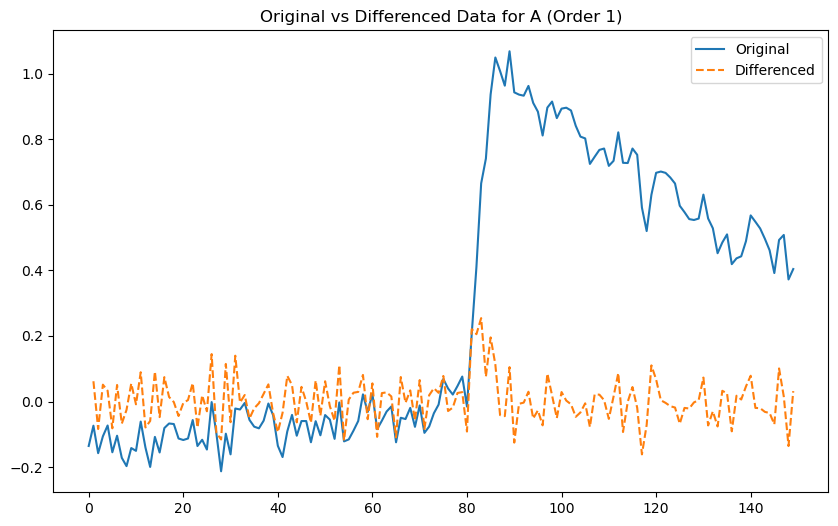

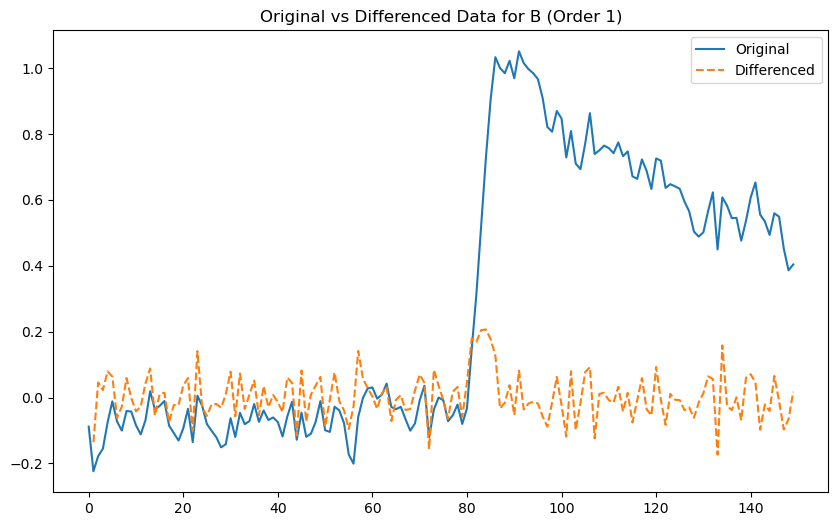

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    20.616               0.000                2                True
B => A    11.086               0.000                2                True



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    20.616               0.000                2                True\nB => A    11.086               0.000                2                True\n'

In [5]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

dummy_warming_lagged_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data, 'A','B', max_lags=10)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from toolbox import GC_functions as GC  # Assuming GC_functions is your custom module
from toolbox import syth_ana_functions as saf

# Initialize parameters
# beta = np.arange(0.1, 1.1, 0.1)  # From 0.1 to 1.0 in steps of 0.1
beta = np.arange(1e-5, 1e-4+1e-5, 1e-5)  # From 0.1 to 1.0 in steps of 0.1
lags = range(11)  # From 0 to 10
iterations = 100
causal_AB_results = np.zeros((len(beta), len(lags)))
causal_BA_results = np.zeros((len(beta), len(lags)))

causal_AB_true_count_all = np.zeros((len(beta), len(lags)))
causal_BA_true_count_all = np.zeros((len(beta), len(lags)))

# Loop through combinations of causal strengths and lags
for i, strength in enumerate(beta):
    for j, lag in enumerate(lags):
        causal_AB_true_count = 0
        causal_BA_true_count = 0
        
        for _ in range(iterations):
            # Generate dummy data and linked data
            # print (f'beta: {beta}, lag: {-lag}')
            data = saf.gen_bi_directional_data(length=1500, delta=10.0, lag=-lag, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, tau=13.649751415738818, beta=strength, sigma=0.05)
            # dummy_data = gen_dummy_DO(length=1500, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.06633234778696487, tau=13.649751415738818)
            # dummy_warming_lagged = gen_linked_data(dummy_data, causal_strength=strength, delta=10.0, lag=lag, tau=13.649751415738818, sigma=0.06633234778696487)
            
            df_gc = data[['A', 'B']]
            
            df_gc_checked = GC.make_stationary(df_gc,['A', 'B'], test_method='ADF', plot=False)
            gc_results_A_B = GC.gc4vars(df_gc_checked, max_lags=19, print_results=False)
            causal_AB = gc_results_A_B[0]['XY']
            causal_BA = gc_results_A_B[0]['YX']
            
            if causal_AB:
                causal_AB_true_count += 1
            if causal_BA:
                causal_BA_true_count += 1
        
        # Calculate the percentages
        causal_AB_results[i, j] = causal_AB_true_count / iterations
        causal_BA_results[i, j] = causal_BA_true_count / iterations

        causal_AB_results[i, j]  = causal_AB_results[i, j]  >= 0.95
        causal_BA_results[i, j] = causal_BA_results[i, j] >= 0.95
        
        causal_AB_true_count_all[i, j] = causal_AB_true_count
        causal_BA_true_count_all[i, j] = causal_BA_true_count



causal_results_red_nozscore = np.where((causal_AB_results == 1) & (causal_BA_results == 1), 1, 0)



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_cau

In [5]:
# save the results to D:\VScode\Paleoclimate_causality\syth_test_results
import numpy as np

np.save('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_AB_results_twoways_GC.npy', causal_AB_results)
np.save('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_BA_results_twoways_GC.npy', causal_BA_results)
np.save('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_results_red_nozscore_twoways_GC.npy', causal_results_red_nozscore)
np.save('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_AB_true_count_all_twoways_GC.npy', causal_AB_true_count_all)
np.save('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_BA_true_count_all_twoways_GC.npy', causal_BA_true_count_all)

In [1]:
# load data
import numpy as np

causal_AB_results = np.load('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_AB_results_twoways_GC.npy')
causal_BA_results = np.load('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_BA_results_twoways_GC.npy')
causal_results_red_nozscore = np.load('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_results_red_nozscore_twoways_GC.npy')
causal_AB_true_count_all = np.load('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_AB_true_count_all_twoways_GC.npy')
causal_BA_true_count_all = np.load('D:\\VScode\\Paleoclimate_causality\\syth_test_results\\causal_BA_true_count_all_twoways_GC.npy')

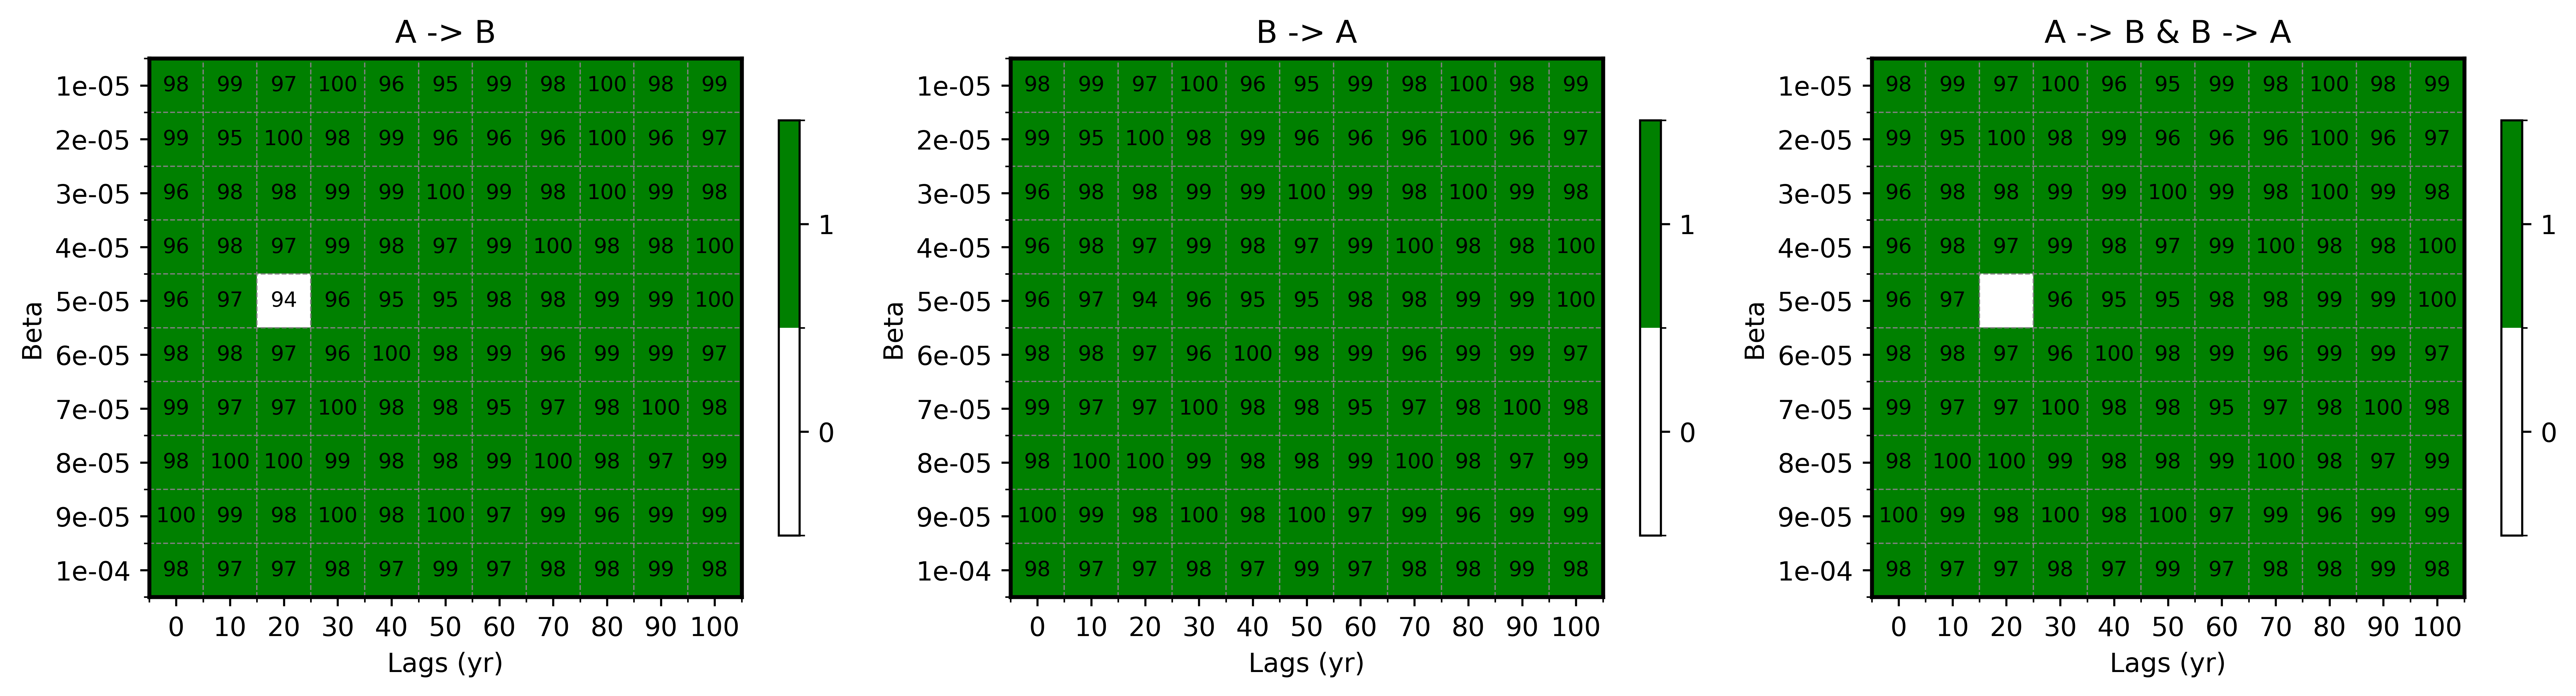

In [10]:
from toolbox import syth_ana_functions as saf
import matplotlib.pyplot as plt
import importlib    
importlib.reload(saf)

beta = np.arange(1e-5, 1e-4+1e-5, 1e-5)  
lags = range(11)  # From 0 to 10

X=np.array(lags)
Y=np.array(beta)



fig, axs = plt.subplots(1, 3, figsize=(14,4), dpi=600)  # 1 row, 3 columns of plots

# Plot each of the causal matrices with text annotations
saf.causal_matshow_ax(causal_AB_results, causal_AB_true_count_all, axs[0], X=X, Y=Y, title='A -> B', ylabel='Beta',show_counts=True)
saf.causal_matshow_ax(causal_BA_results, causal_AB_true_count_all, axs[1], X=X, Y=Y, title='B -> A', ylabel='Beta',show_counts=True)

# create AB_BA_count, and if causal_results_red_nozscore is 1, set the value in AB_BA count to the value from the causal_AB_true_count_all
AB_BA_count = np.zeros((len(beta), len(lags)))
for i in range(len(beta)):
    for j in range(len(lags)):
        if causal_results_red_nozscore[i,j] == 1:
            AB_BA_count[i,j] = causal_AB_true_count_all[i,j]
        else:
            AB_BA_count[i,j] = np.nan


# Assuming causal_results_red_nozscore is derived in your existing code
saf.causal_matshow_ax(causal_results=causal_results_red_nozscore, counts=AB_BA_count, ax=axs[2], X=X, Y=Y, title='A -> B & B -> A', ylabel='Beta',show_counts=True)
plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# True positive for causal_AB_results are the ones, true negative for causal_BA_results are the zeros
true_positives = np.sum(causal_AB_results == 1)/110
false_negatives = np.sum(causal_AB_results == 0)/110
true_negatives = np.sum(causal_BA_results == 1)/110
false_positives = np.sum(causal_BA_results == 0)/110

# Confusion matrix for A->B vs B->A
conf_matrix = np.array([
    [true_positives, false_positives],
    [false_negatives, true_negatives]
])

# Plot the confusion matrix with the corrected syntax
fig, ax = plt.subplots(figsize=(6, 4.5), dpi=600)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', ax=ax, vmax=1, vmin=0, 
            yticklabels=['Predicted True (A->B)', 'Predicted False (B->A)'],
            xticklabels=['Actual True (A->B)', 'Actual False (B->A)'])
# add colorbar xlabel
cbar = ax.collections[0].colorbar
cbar.set_label('Percentage of Total Predictions')
# plt.title('Confusion Matrix for Causal Inference Test Results')
# plt.xlabel('Predicted Condition')
# plt.ylabel('Actual Condition')
plt.show()

# Test what happens if A and B are independent

In [5]:
import numpy as np
import pandas as pd
from toolbox import syth_ana_functions as saf

def gen_independent_data(length, delta=10.0, t0=800.0, dt=50.0, dy=1.0, GS_slope=5e-4, GIS_slope=-1e-3, sigma=0.05):
    """
    Generate time series data demonstrating bi-directional causality.
    
    Args:
    length (int): Length of the time series data.
    delta (float): Time step.
    sigma (float): Standard deviation of the noise.
    alpha, beta, gamma, (float): Coefficients describing the interaction between the series.

    Returns:
    pandas.DataFrame: DataFrame containing bi-directionally linked synthetic data.

    """


    time = np.arange(length, step=delta, dtype='float')
    
    noise_A = np.random.normal(0, sigma, len(time))
    noise_B = np.random.normal(0, sigma, len(time))

    
    trans_A = saf.linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)

    # trans_B = linear_ramp(time, t0=t0-lag*10, dt=dt, y0=0.0, dy=dy, GS_slope=GS_slope, GIS_slope=GIS_slope)
    trans_B = trans_A


    A=trans_A+noise_A
    B=trans_B+noise_B
    
    df = pd.DataFrame({
        'time': time,
        'A': A,
        'B': B
    })
    
    # drop nan values
    df = df.dropna()

    return df

In [12]:
import matplotlib.pyplot as plt
from toolbox import syth_ana_functions as saf

lag=0
data = gen_independent_data(length=1500, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=0.05)


# Enhance the plot
plt.figure(figsize=(5.5, 4),dpi=600)  # Adjust the figure size
plt.plot(data['time'], data['A'], label='Series A', linestyle='-', marker='o', markersize=4)
plt.plot(data['time'], data['B'], label=f'Series B, lag={lag*-10}yr', linestyle='-', marker='x', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.4)
# plt.title('Time Series of Dummy Warming Data')
plt.xlabel('Model Year')
plt.ylabel('Values')

# Add legend
plt.legend()

plt.show()

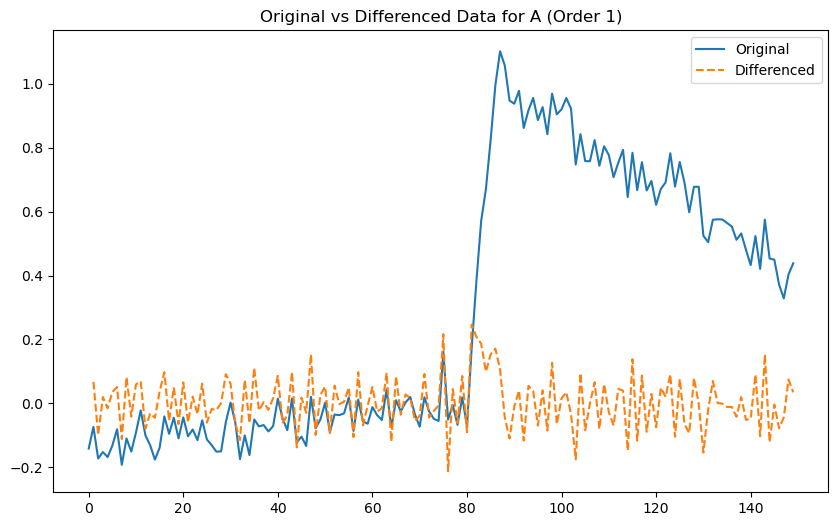

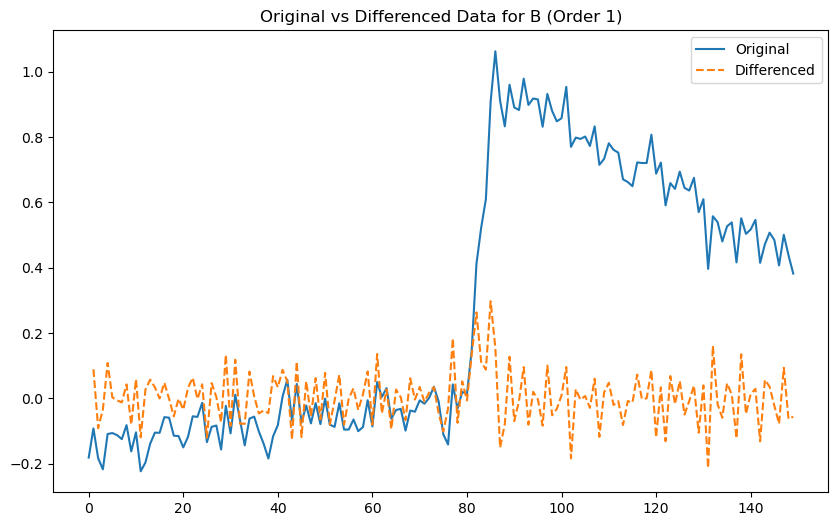

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
A => B    28.098               0.000                1                True
B => A    46.657               0.000                1                True



d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


'Granger Causality Test\n------------------------------------------------------------\nDirection                   F-statistics         p-value         lag         Granger cause\nA => B    28.098               0.000                1                True\nB => A    46.657               0.000                1                True\n'

In [8]:
from toolbox import GC_functions as GC
import importlib
importlib.reload(GC)

dummy_warming_lagged_checked = GC.make_stationary(data,['A', 'B'], test_method='ADF', plot=True)
GC.gc_test(data, 'A','B', max_lags=10)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from toolbox import GC_functions as GC  # Assuming GC_functions is your custom module
from toolbox import syth_ana_functions as saf

# Initialize parameters
sigma = np.arange(1e-2, 1e-1+1e-2, 1e-2)  # From 0.1 to 1.0 in steps of 0.1
lags = range(11)  # From 0 to 10
iterations = 100
causal_AB_results = np.zeros((len(sigma), len(sigma)))
causal_BA_results = np.zeros((len(sigma), len(sigma)))

# Loop through combinations of causal strengths and lags
for i, strength in enumerate(sigma):
    for j, lag in enumerate(lags):
        causal_AB_true_count = 0
        causal_BA_true_count = 0
        
        for _ in range(iterations):
            # Generate dummy data and linked data
            # print (f'beta: {beta}, lag: {-lag}')
            data = gen_independent_data(length=1500, delta=10.0, t0=800.0, dt=56.32925780771254, dy=1.0, GS_slope=0.00016431508734689263, GIS_slope=-0.0009404944834246113, sigma=strength)

            df_gc = data[['A', 'B']]
            
            df_gc_checked = GC.make_stationary(df_gc,['A', 'B'], test_method='ADF', plot=False)
            gc_results_A_B = GC.gc4vars(df_gc_checked, max_lags=19, print_results=False)
            causal_AB = gc_results_A_B[0]['XY']
            causal_BA = gc_results_A_B[0]['YX']
            
            if causal_AB:
                causal_AB_true_count += 1
            if causal_BA:
                causal_BA_true_count += 1
        
        # Calculate the percentages
        causal_AB_results[i, j] = causal_AB_true_count / iterations
        causal_BA_results[i, j] = causal_BA_true_count / iterations

        causal_AB_results[i, j]  = causal_AB_results[i, j]  >= 0.95
        causal_BA_results[i, j] = causal_BA_results[i, j] >= 0.95



causal_results_red_nozscore = np.where((causal_AB_results == 1) & (causal_BA_results == 1), 1, 0)


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_cau

IndexError: index 10 is out of bounds for axis 1 with size 10

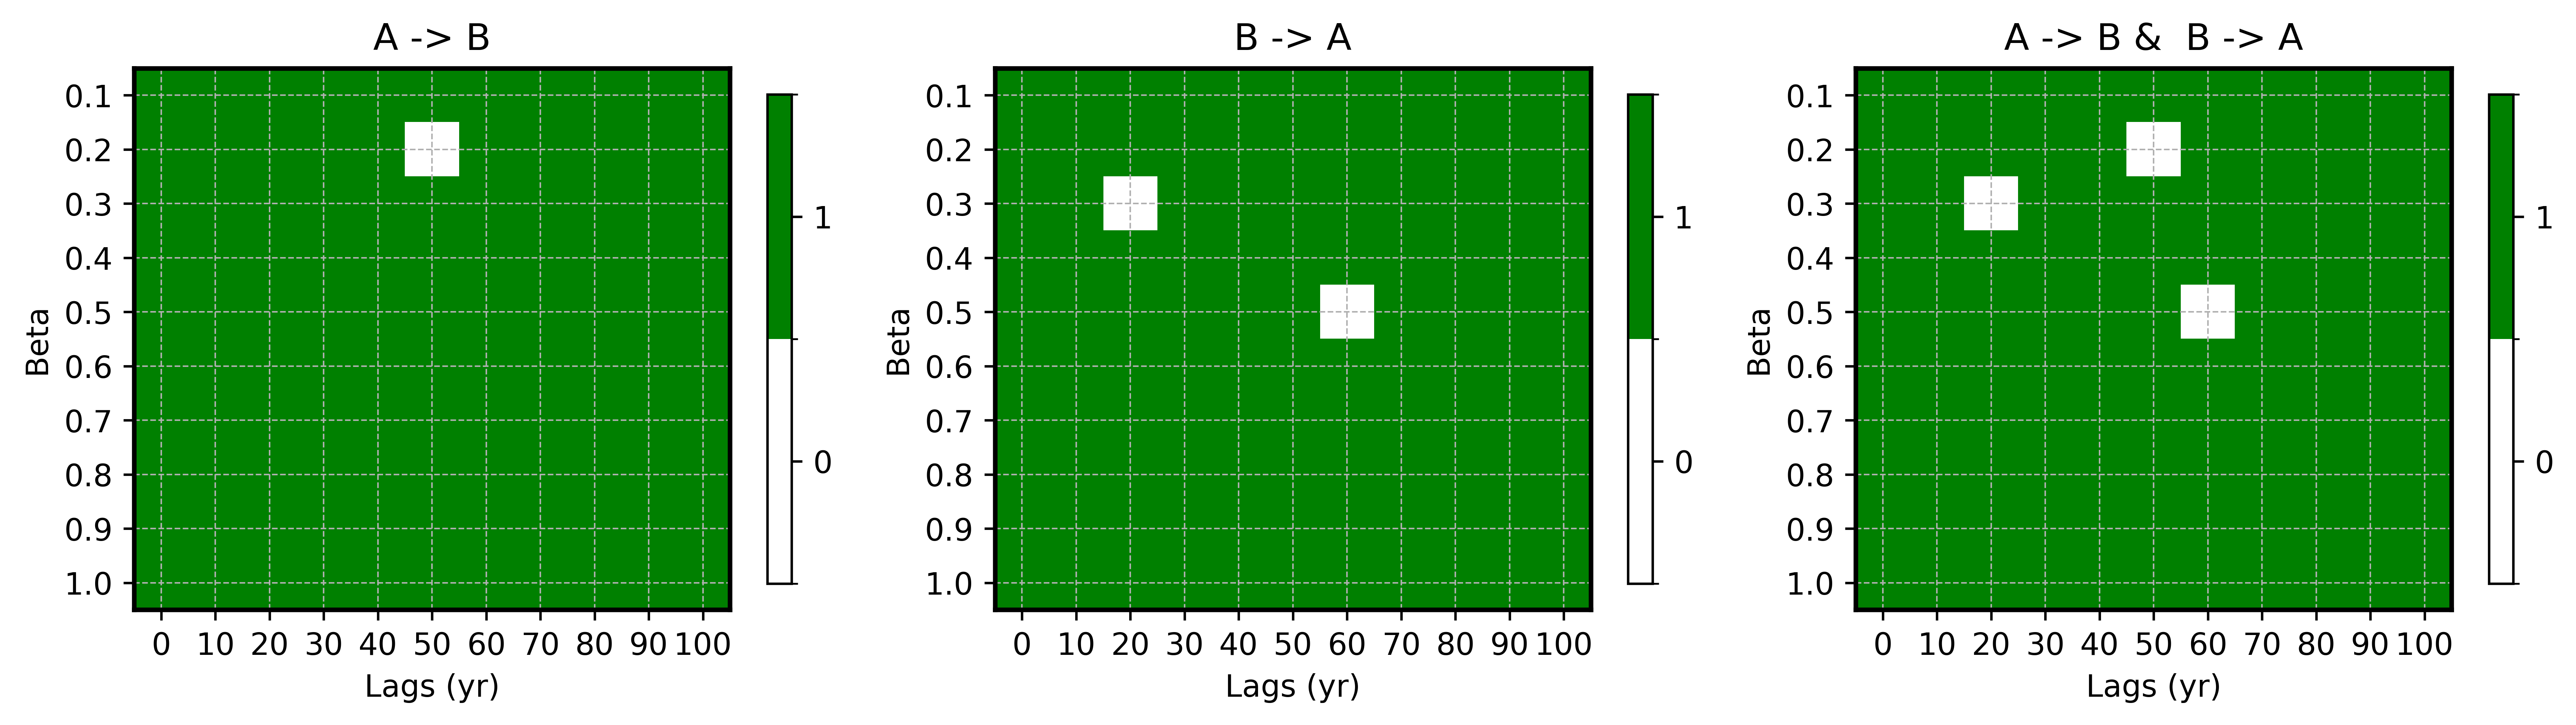

In [ ]:
from toolbox import syth_ana_functions as saf

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=600)  # 1 row, 3 columns of plots

# Plot each of the causal matrices with text annotations
saf.causal_matshow_ax(causal_AB_results, axs[0], title='A -> B', ylabel='Beta')
saf.causal_matshow_ax(causal_BA_results, axs[1], title='B -> A', ylabel='Beta')

# Assuming causal_results_red_nozscore is derived in your existing code
saf.causal_matshow_ax(causal_results_red_nozscore, axs[2], title='A -> B &  B -> A', ylabel='Beta')

plt.tight_layout()
plt.show()